In [56]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
from numpy.random import randn
import os
from datetime import datetime

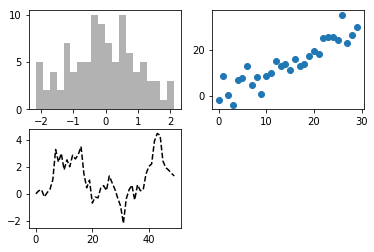

In [57]:
# maplotlib的图像都在Figure对象中，可以用plt.figure创建一个新的Figure
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)             # 返回的是AxesSubplot对象
plt.plot(randn(50).cumsum(),'k--')  # k-- 是一个线型选项,最简单的折线图

_ = ax1.hist(randn(100),bins=20,color='k',alpha=0.3)  # 直方图
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))       # 散点图


[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E249D56A0>


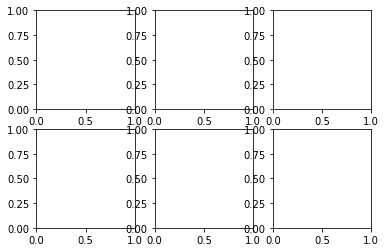

In [58]:
# 也可以根据plt.subplots方法中直接创建一个新的figure对象，
# 并返回一个含有已创建的subplot对象的numpy数组
fig, axes = plt.subplots(2,3)
print(axes)

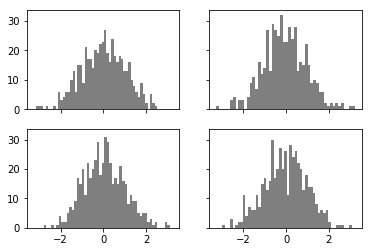

In [59]:
# 未调整subplot周围的间距
fig, axes = plt.subplots(2, 2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)


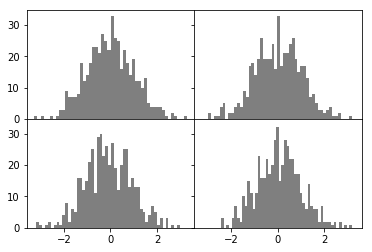

In [60]:
# 调整subplot周围的间距
fig, axes = plt.subplots(2, 2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0) # 注意其中的轴标签重叠了


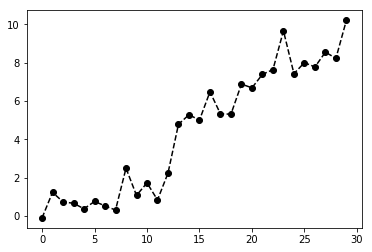

In [61]:
plt.plot(randn(30).cumsum(),'ko--') # 

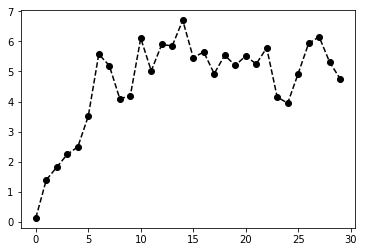

In [62]:
# 还可以将其写成更为明确的形式,和上面的参数设置效果是一样的
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

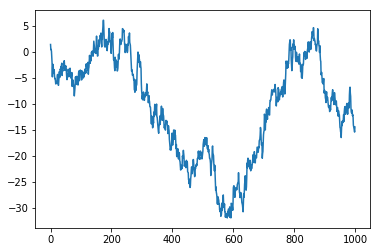

In [63]:
# 刻度、标签和图例，下面介绍如何设置标题、周标签、刻度以及刻度标签
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

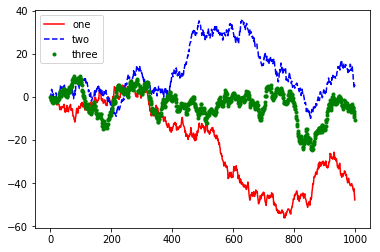

In [64]:
# 添加图例，添加图例有两种方式：
# 第一种方式，在添加subplot的时候传入label参数：
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(),'k',label='one',color='r')
ax.plot(randn(1000).cumsum(),'k--',label='two',color='b')
ax.plot(randn(1000).cumsum(),'k.',label='three',color='g')
# 然后调用ax.legend()来自动创建图例：
ax.legend(loc='best')

Text(0, 0.5, 'Ystages')

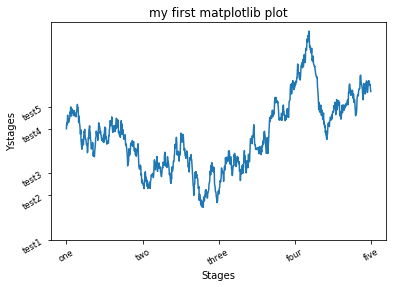

In [65]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ticks = ax.set_yticks([-25, -15, -10, 0, 5])
labels = ax.set_yticklabels(['test1','test2','test3','test4','test5'],rotation=30,fontsize='small')
ax.set_title('my first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Ystages')


Text(0.75, 0.6, 'Hello world!')

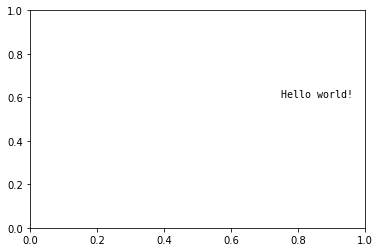

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.75, 0.6,           # 相对坐标轴的比例
        'Hello world!',
        family='monospace',
        fontsize=10)                # 放置标注文本

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


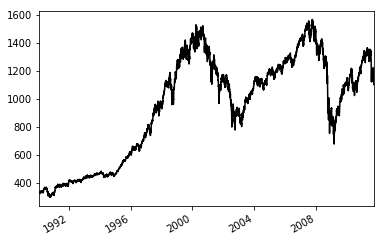

In [67]:
path = os.getcwd()+'\My_python_for_data_analyst\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


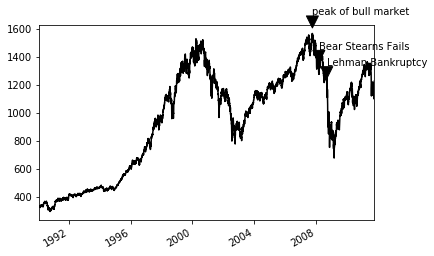

In [73]:
path = os.getcwd()+'\My_python_for_data_analyst\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
for date,label in crisis_data:
    ax.annotate(label,xy=(date, spx.asof(date)+50)
                    ,xytext=(date,spx.asof(date)+200)
                    ,arrowprops=dict(facecolor='black')
                    ,horizontalalignment='left'
                    ,verticalalignment='top')
# 

In [ ]:
path = os.getcwd()+'\My_python_for_data_analyst\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
for date,label in crisis_data:
    ax.annotate(label,xy=(date, spx.asof(date)+50)
                    ,xytext=(date,spx.asof(date)+200)
                    ,arrowprops=dict(facecolor='black')
                    ,horizontalalignment='left'
                    ,verticalalignment='top')
# 放大到2007-2010
